In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

## 1. Đọc và xem mô tả dữ liệu

In [2]:
df = pd.read_csv('Data/Credit_Scoring.csv')
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149987,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149992 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 2   age                                   149992 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 4   DebtRatio                             149992 non-null  float64
 5   MonthlyIncome                         120262 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 7   NumberOfTimes90DaysLate               149992 non-null  int64  
 8   NumberRealEstateLoansOrLines          149992 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 10  NumberOfDependents                    146068 non-null  float64
dtype

## 2. Kiểm tra dữ liệu khiếm khuyết và xử lý

### 2.1 Kiểm tra % thiếu của từng cột

In [5]:
def missing_ratio(col):
    return round(np.mean(col.isna()) * 100,2)

df.apply([missing_ratio])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
missing_ratio,0.0,0.0,0.0,0.0,0.0,19.82,0.0,0.0,0.0,0.0,2.62


### 2.2 Các dòng có ít nhất 1 giá trị thiếu

In [6]:
df[df.isna().any(axis = 1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
8,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
24,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
33,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
44,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149968,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149969,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149976,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149984,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


### 2.3 Xử lý dữ liệu thiếu

In [7]:
# fill bằng nội suy
df2 = df.interpolate(axis = 1)

In [8]:
# fill giá trị khiếm khuyết bằng 0
df3 = df.fillna(0)

## 3. Vẽ boxplot và loại bỏ giá trị ngoại lai
- Dùng tập dữ liệu sau khi nội suy

<AxesSubplot:>

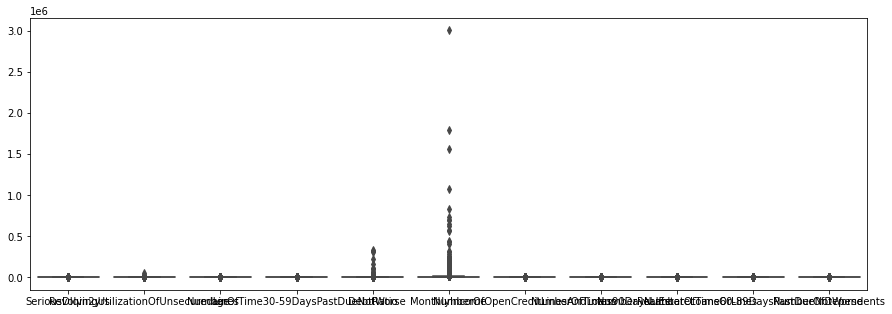

In [9]:
plt.rcParams['figure.figsize'] = 15,5
sns.boxplot(data = df2)

Giá trị skew trước khi loại bỏ outlier: 120.7404578579538


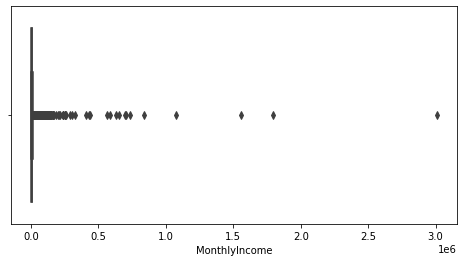

In [10]:
plt.rcParams['figure.figsize'] = 8,4
sns.boxplot(x = df2['MonthlyIncome'])
skew_before = skew(df2['MonthlyIncome'])
print(f'Giá trị skew trước khi loại bỏ outlier: {skew_before}')

In [11]:
Q1 = df.quantile(q = 0.25)
Q3 = df.quantile(q = 0.75)
IQR = Q3 - Q1

In [12]:
df2 = df2[~((df2 < Q1 - 1.5* IQR) | (df2 > Q3 + 1.5*IQR)).any(axis = 1)]

In [13]:
df2.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76851.0,76851.000000,76851.000000,76851.0,76851.000000,76851.000000,76851.000000,76851.0,76851.000000,76851.0,76851.000000
mean,0.0,0.264360,52.927522,0.0,0.317651,5709.677929,8.048275,0.0,0.931179,0.0,0.518302
std,0.0,0.317237,15.387554,0.0,0.281741,3243.077910,4.299362,0.0,0.942394,0.0,0.743491
min,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.0,0.023132,41.000000,0.0,0.111332,3309.500000,5.000000,0.0,0.000000,0.0,0.000000
50%,0.0,0.111555,53.000000,0.0,0.268504,5120.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,0.0,0.417408,64.000000,0.0,0.443173,7700.000000,11.000000,0.0,2.000000,0.0,1.000000
max,0.0,1.341700,96.000000,0.0,1.908046,15509.000000,20.000000,0.0,5.000000,0.0,2.000000


<AxesSubplot:xlabel='MonthlyIncome'>

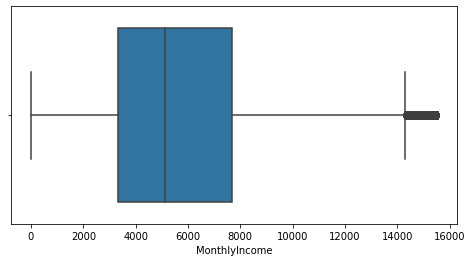

In [14]:
sns.boxplot(x = df2['MonthlyIncome'])

In [15]:
skew_after = skew(df2['MonthlyIncome'])
print(f'Giá trị skew bằng IQR: {skew_after}')
# good

Giá trị skew bằng IQR: 0.6514907338726068


## 4. Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm

### 4.1 Số giá trị đối với từng cột

In [16]:
def count_value(col):
    return len(col.unique())

df2.agg(count_value)

SeriousDlqin2yrs                            1
RevolvingUtilizationOfUnsecuredLines    65594
age                                        76
NumberOfTime30-59DaysPastDueNotWorse        1
DebtRatio                               69192
MonthlyIncome                           10474
NumberOfOpenCreditLinesAndLoans            21
NumberOfTimes90DaysLate                     1
NumberRealEstateLoansOrLines                6
NumberOfTime60-89DaysPastDueNotWorse        1
NumberOfDependents                          3
dtype: int64

### Ta sẽ không rời rạc hóa các cột có số giá trị < 4 ==> tham số duplicates = 'drop' giúp ta làm điều đó

In [18]:
def cut_into_4(col,bins = 4):
    return pd.qcut(col,bins,duplicates='drop')

cats = df2.apply(cut_into_4)
# check vài nhóm minh họa
print(cats['RevolvingUtilizationOfUnsecuredLines'].value_counts())
print(cats['MonthlyIncome'].value_counts())

(-0.001, 0.0231]    19215
(0.417, 1.342]      19213
(0.112, 0.417]      19212
(0.0231, 0.112]     19211
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64
(5120.0, 7700.0]     19231
(-0.001, 3309.5]     19213
(3309.5, 5120.0]     19213
(7700.0, 15509.0]    19194
Name: MonthlyIncome, dtype: int64


## 5.  Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [19]:
def cut_into_5(col,bins = [0,30,40,50,80,150]):
    return pd.cut(col,bins)

cats = df2[['age','MonthlyIncome']].apply(cut_into_5)
print(cats['age'].value_counts())
print(cats['MonthlyIncome'].value_counts())

(50, 80]     39688
(40, 50]     15879
(30, 40]     12353
(0, 30]       6039
(80, 150]     2892
Name: age, dtype: int64
(0, 30]      1331
(80, 150]      15
(30, 40]        1
(50, 80]        1
(40, 50]        0
Name: MonthlyIncome, dtype: int64


## 6. Đặt tên bất kỳ cho các nhóm ở 2 ý trên.

In [20]:
def cut_into_5(col,bins = [0,30,40,50,80,150],
               labels =['number1','number2','number3','number4','number5']):
    return pd.cut(col,bins,labels = labels)

cats = df2[['age','MonthlyIncome']].apply(cut_into_5)
print(cats['age'].value_counts())
print(cats['MonthlyIncome'].value_counts())

number4    39688
number3    15879
number2    12353
number1     6039
number5     2892
Name: age, dtype: int64
number1    1331
number5      15
number2       1
number4       1
number3       0
Name: MonthlyIncome, dtype: int64
